In [1]:
%env ASTERIA=/home/jakob/software/ASTERIA/ASTERIA/

import os
import sys

from astropy.table import Table
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

from snewpy import model_path
from snewpy.neutrino import Flavor
from snewpy.models.ccsn import Analytic3Species

from asteria.simulation import Simulation
from asteria import set_rcparams

set_rcparams()
%matplotlib inline

env: ASTERIA=/home/jakob/software/ASTERIA/ASTERIA/


In [23]:
filename = "RDF_1_2.dat"
model_folder = f"{model_path}/RDF_1_2/"

if not os.path.exists(model_folder):
    os.makedirs(model_folder)
file_path = os.path.join(model_folder, filename)
print(file_path)

/home/jakob/.astropy/cache/snewpy/models/RDF_1_2/RDF_1_2.dat


In [24]:
model_name1 = "Model_1_2"
model_name2 = "model_12"
path_to_asteria = os.environ["ASTERIA"]
path_to_model = os.path.join(path_to_asteria, f"docs/gen2-ana/seperate/model/{model_name1}")

#luminosities
l_nue=np.load(os.path.join(path_to_model, f"luminosity_nue_smooth_{model_name2}.npy"))
l_nua=np.load(os.path.join(path_to_model, f"luminosity_nua_smooth_{model_name2}.npy"))
l_nux=np.load(os.path.join(path_to_model, f"luminosity_nux_smooth_{model_name2}.npy"))

#mean energies
E_nue=np.load(os.path.join(path_to_model, f"averagee_nue_smooth_{model_name2}.npy"))
E_nua=np.load(os.path.join(path_to_model, f"averagee_nua_smooth_{model_name2}.npy"))
E_nux=np.load(os.path.join(path_to_model, f"averagee_nux_smooth_{model_name2}.npy"))

#root mean square energy
RMS_nue=np.load(os.path.join(path_to_model, f"rmse_nue_smooth_{model_name2}.npy"))
RMS_nua=np.load(os.path.join(path_to_model, f"rmse_nua_smooth_{model_name2}.npy"))
RMS_nux=np.load(os.path.join(path_to_model, f"rmse_nux_smooth_{model_name2}.npy"))

times=np.load(os.path.join(path_to_model, f"times_smooth_{model_name2}.npy"))


rms_or_pinch="rms"

# Make an astropy table with two times, 0s and 1s, with constant neutrino properties
table = Table()
table['TIME'] = times
table['L_NU_E'] =  l_nue
table['L_NU_E_BAR'] = l_nua
table['L_NU_X'] = l_nux #Note, L_NU_X is set to 1/4 of the total NU_X energy
        
table['E_NU_E'] = E_nue
table['E_NU_E_BAR'] = E_nua
table['E_NU_X'] =E_nux


if rms_or_pinch == "rms":
    table['RMS_NU_E'] = RMS_nue
    table['RMS_NU_E_BAR'] = RMS_nua
    table['RMS_NU_X'] = RMS_nux
    table['ALPHA_NU_E'] = (2.0 * table['E_NU_E'] ** 2 - table['RMS_NU_E'] ** 2) / (
        table['RMS_NU_E'] ** 2 - table['E_NU_E'] ** 2)
    table['ALPHA_NU_E_BAR'] = (2.0 * table['E_NU_E_BAR'] ** 2 - table['RMS_NU_E_BAR'] ** 2) / (
        table['RMS_NU_E_BAR'] ** 2 - table['E_NU_E_BAR'] ** 2)
    table['ALPHA_NU_X'] = (2.0 * table['E_NU_X'] ** 2 - table['RMS_NU_X'] ** 2) / (
        table['RMS_NU_X'] ** 2 - table['E_NU_X'] ** 2)
else:
    print("incorrect second moment method: rms or pinch")

table.write(file_path,format='ascii',overwrite=True)

In [5]:
import matplotlib.font_manager as fm
print([f.name for f in fm.fontManager.ttflist])

['STIXSizeTwoSym', 'STIXSizeTwoSym', 'STIXSizeThreeSym', 'DejaVu Sans', 'DejaVu Sans', 'cmtt10', 'STIXNonUnicode', 'STIXSizeOneSym', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Sans Display', 'cmex10', 'STIXSizeOneSym', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans Mono', 'cmmi10', 'STIXSizeFiveSym', 'STIXSizeThreeSym', 'STIXSizeFourSym', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Serif Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeFourSym', 'cmr10', 'DejaVu Serif', 'DejaVu Serif', 'cmb10', 'cmsy10', 'DejaVu Serif', 'STIXGeneral', 'STIXGeneral', 'cmss10', 'STIXGeneral', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono']


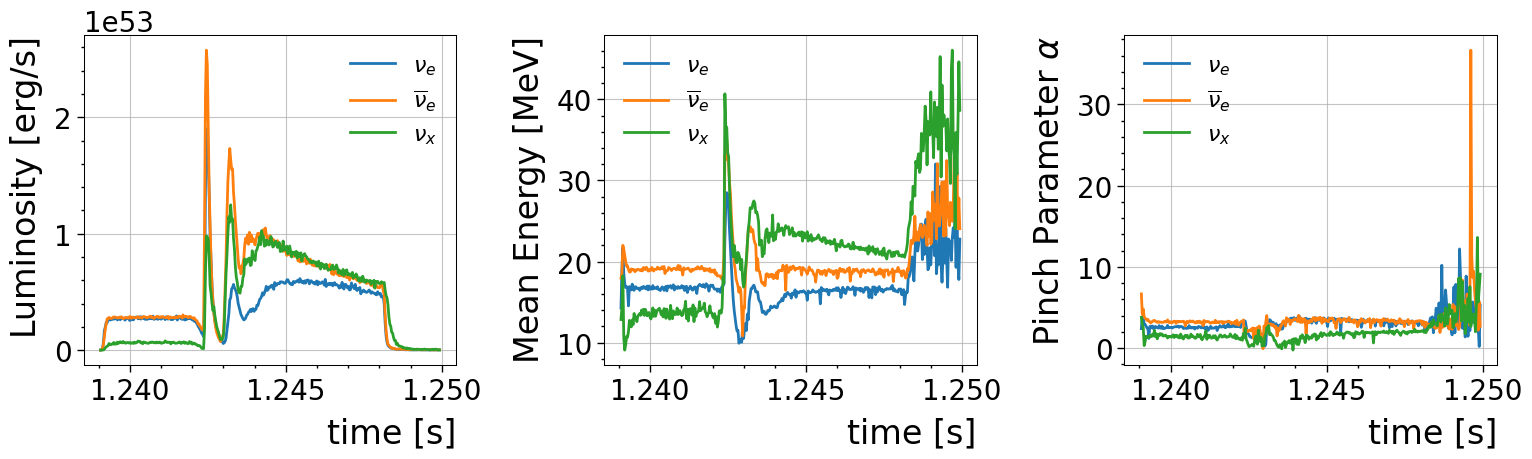

In [ ]:
model = Analytic3Species(os.path.join(model_folder, filename))
flavors = [Flavor.NU_E,Flavor.NU_E_BAR,Flavor.NU_X]

fig,axes = plt.subplots(1,3,figsize=(16,5))
plt.subplots_adjust(wspace=0.3)
for flavor in flavors:
    axes[0].plot(model.time,model.luminosity[flavor],label=flavor.to_tex())
axes[0].set_ylabel("Luminosity [erg/s]")
axes[0].set_xlabel("time [s]")
axes[0].legend(frameon=False)

for flavor in flavors:
    axes[1].plot(model.time,model.meanE[flavor],label=flavor.to_tex())
axes[1].set_ylabel("Mean Energy [MeV]")
axes[1].set_xlabel("time [s]")
axes[1].legend(frameon=False)

for flavor in flavors:
    axes[2].plot(model.time,model.pinch[flavor],label=flavor.to_tex())
axes[2].set_ylabel(r"Pinch Parameter $\alpha$")
axes[2].set_xlabel("time [s]")
axes[2].legend(frameon=False)

plt.tight_layout()

In [72]:
tab = Table().read(file_path, format = "ascii")

In [75]:
tab["TIME"][1]

np.float64(1.2390949999999998)

In [ ]:
tab = table.read(file_path, format = "ascii")

time = tab['TIME']


# SNEWPY model dictionary, the format must match the below example for analytic mdoels
model = {
    'name': 'Analytic3Species',
    'param': {
        'filename': file_path
    }
}
# 

sim = Simulation(model=model,
                distance=10* u.kpc, 
                Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                tmin=times[0]*u.s,  tmax= times[-1]*u.s, dt=1E-4*u.s,
                mixing_scheme='AdiabaticMSW',
                hierarchy='normal')

sim.run()


In [62]:
file_path

'/home/jakob/.astropy/cache/snewpy/models/RDF_1_2/RDF_1_2.dat'

Text(0, 1.0, 'Total Signal [0.0001 s Bins]')

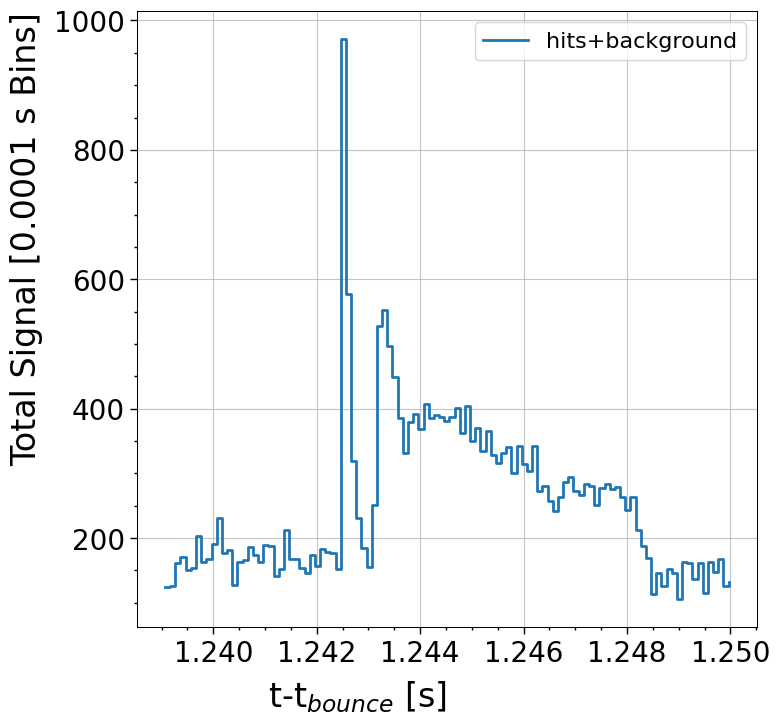

In [53]:
fig, ax = plt.subplots(1, figsize = (8,8))
dt = 0.0001* u.s
scale = 1

sim.rebin_result(dt)
t, hits = sim.detector_signal(dt, subdetector="i3")
bg = sim.detector.i3_bg(dt, size=hits.size)

ax.step(t, hits+bg, where='post', lw=2,label='hits+background' )
ax.legend()
ax.set_xlabel(r't-t$_{bounce}$ [s]', ha='right')
ax.set_ylabel(fr'Total Signal [{dt} Bins]', ha='right', y=1.0)

In [76]:
import analysis

ModuleNotFoundError: No module named 'analysis'